# B-scan from a metal cylinder (2D)

This example uses the same geometry as the previous (A-scan) example but this time a B-scan is created. A B-scan is composed of multiple traces (A-scans) recorded as the source and receiver are moved over the target, in this case the metal cylinder. The input needed to create the model is:

### my_cylinder_Bscan_2D.in

In [ ]:
%%writefile ../../user_models/cylinder_Bscan_2D.in
#title: B-scan from a metal cylinder buried in a dielectric half-space
#domain: 0.240 0.210 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 3e-9

#material: 6 0 1 0 half_space

#waveform: ricker 1 1.5e9 my_ricker
#hertzian_dipole: z 0.040 0.170 0 my_ricker
#rx: 0.080 0.170 0
#src_steps: 0.002 0 0
#rx_steps: 0.002 0 0

#box: 0 0 0 0.240 0.170 0.002 half_space
#cylinder: 0.120 0.080 0 0.120 0.080 0.002 0.010 pec

The differences between this input file and the one from the A-scan are the x coordinates of the source and receiver, and the commands needed to move the source and receiver. As before, the source and receiver are offset by 40mm from each other as before but they are now shifted to a starting position for the scan. The ``#src_steps`` command is used to move every source in the model by specified steps each time the model is run. Similarly, the ``#rx_steps`` command is used to move every receiver in the model by specified steps each time the model is run. Note, the same functionality can be achieved by using a block of Python code in the input file to move the source and receiver individually (for further details see the Python section of the User Guide).

## Run the model

To run the model to create a B-scan you must pass an optional argument to specify the number of times the model should be run. In this case this is the number of A-scans (traces) that will comprise the B-scan. For a B-scan over a distance of 120mm with a step of 2mm that is 60 A-scans. You can now run the model using:
    
    python -m gprMax user_models/cylinder_Bscan_2D.in -n 60

In [ ]:
import os
from gprMax.gprMax import api

filename = os.path.join(os.pardir, os.pardir, 'user_models', 'cylinder_Bscan_2D.in')
api(filename, n=60, geometry_only=False)

## View the results

### Merge A-scans into B-scan

You should have produced 60 output files, one for each A-scan, with names ``my_cylinder_Bscan_2D1.out``, ``my_cylinder_Bscan_2D2.out`` etc... These can be combined into a single file using the command:

    python -m tools.outputfiles_merge user_models/cylinder_Bscan_2D

In [1]:
%run -m tools.outputfiles_merge user_models/cylinder_Bscan_2D

Found 60 files to merge
Do you want to remove the multiple individual output files? [y] or n:


You should see a combined output file ``cylinder_Bscan_2D_merged.out``. The tool will ask you if you want to delete the original single A-scan output files or keep them.

### Plot the B-scan

You can plot the B-scan using:

    python -m tools.plot_Bscan user_models/cylinder_Bscan_2D_merged.out Ez

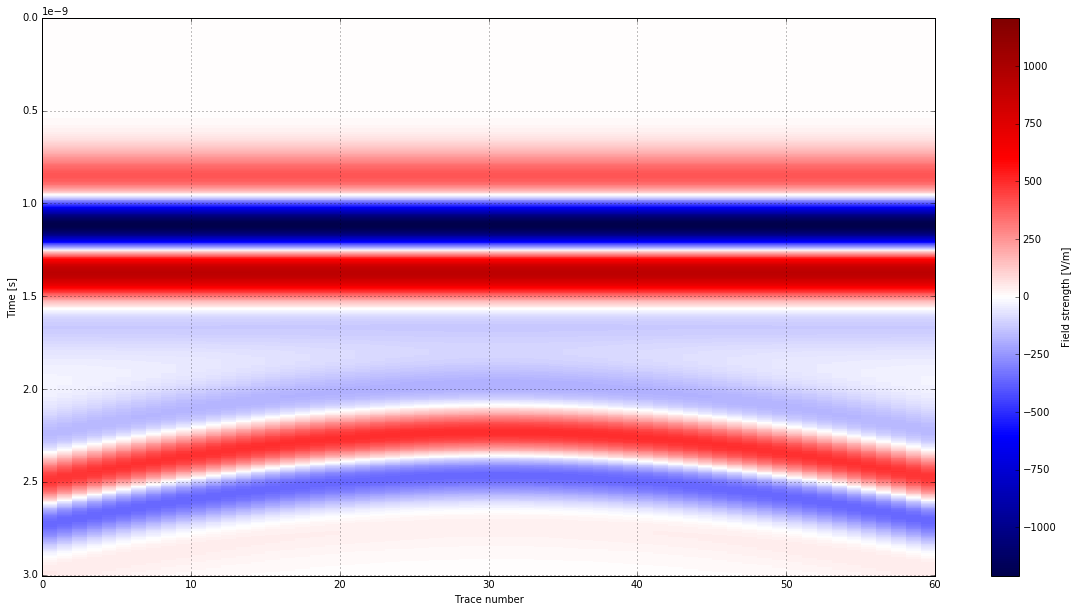

In [1]:
%matplotlib inline
import os
from tools.plot_Bscan import get_output_data, mpl_plot

filename = os.path.join(os.pardir, os.pardir, 'user_models', 'cylinder_Bscan_2D_merged.out')
rxnumber = 1
rxcomponent = 'Ez'
outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)
plt = mpl_plot(outputdata, dt, rxnumber, rxcomponent)

# Change from the default 'seismic' colormap
#plt.set_cmap('gray')

The B-scan (of the $E_z$ field component) shows the initial part of the signal (~0.5-1.5 ns) which represents the direct wave from transmitter to receiver. Then comes the refelected wave (~2-3 ns) from the metal cylinder which creates the hyperbolic shape.